<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/QC_VQE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-visualization
!pip install qiskit-ibm-provider
!pip install qiskit-ibm-runtime
!pip install qiskit-experiments
!pip install imgaug==0.2.5
!pip install pylatexenc

In [2]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf


#
# Loading IBM credentials
#
API_TOKEN_DIR="/content/drive/'My Drive'/'Colab Notebooks'/QC"
API_TOKEN_FILE="MY_API_TOKEN.txt"

#Mount the google drive first
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/'My Drive'/'Colab Notebooks'/QC
%cd $API_TOKEN_DIR

#Read the MY_API_TOKEN from file...
from qiskit_ibm_provider import IBMProvider
MY_API_TOKEN = ""
with open(API_TOKEN_FILE) as f:
  MY_API_TOKEN=f.readline()
IBMProvider.save_account(MY_API_TOKEN, overwrite=True)

[default]
circuit_drawer = mpl
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/QC


References:
* https://www.youtube.com/watch?v=5Gb16WHVYUw&t=73s


## Defining the circuit

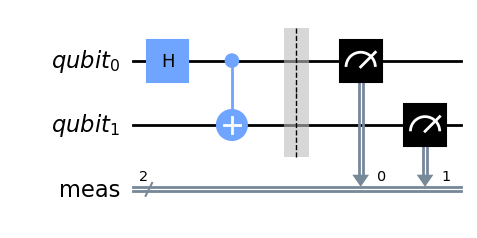

In [3]:
from qiskit import QuantumCircuit, QuantumRegister

qr = QuantumRegister(2, 'qubit')
qc = QuantumCircuit(qr)
qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.measure_all()
qc.draw()

## Running on the backend

### Getting a service

In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

#Instead of a provider (when using qiskit_ibm_provider), here we get a service
service = QiskitRuntimeService()

### Running on a qasm (ideal) simulator (in the backend)

SamplerResult(quasi_dists=[{0: 0.4855, 3: 0.5145}], metadata=[{'shots': 4000}])


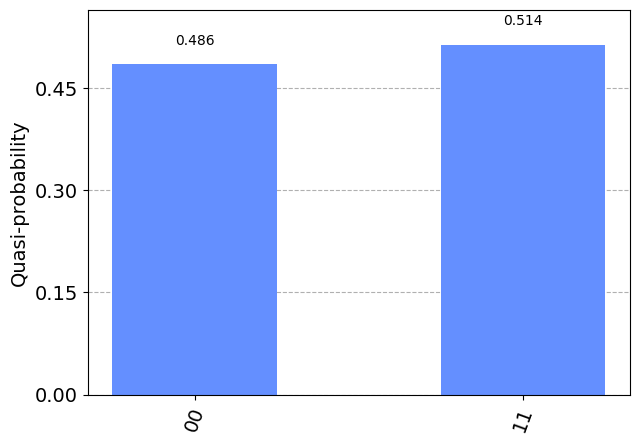

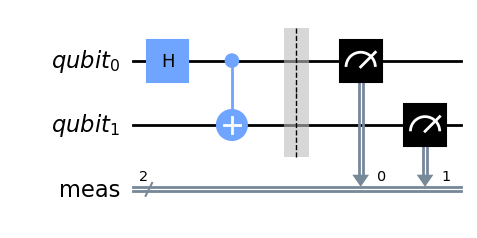

{"status": "Completed", "reason": null, "reason_code": null, "reason_internal": null}


In [14]:
from qiskit.visualization import plot_distribution

backend = service.get_backend('ibmq_qasm_simulator')

with Session(service=service, backend=backend) as session:
  sampler = Sampler()
  job = sampler.run(circuits=qc)
  print(job.result()) #shows quasi probabilities
  display(plot_distribution(job.result().quasi_dists[0].binary_probabilities()))
  display(job.inputs['circuits'][0].draw('mpl'))
  print(job.logs())

### Running on a qasm simulator with noise model (in the backend)

NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['cx', 'reset', 'id', 'x', 'sx', 'measure']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('cx', (4, 3)), ('cx', (3, 4)), ('cx', (2, 3)), ('cx', (3, 2)), ('cx', (1, 2)), ('cx', (2, 1)), ('cx', (0, 1)), ('cx', (1, 0)), ('reset', (0,)), ('reset', (1,)), ('reset', (2,)), ('reset', (3,)), ('reset', (4,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]
SamplerResult(quasi_dists=[{0: 0.4988250332416649, 1: 0.004419552160830689, 2: -0.004468597598100472, 3: 0.501224012195605}], metadata=[{'shots': 100000, 'readout_mitigation_overhead': 3.1566941195380194, 'readout_mitigation_time': 0.033959779000724666}])


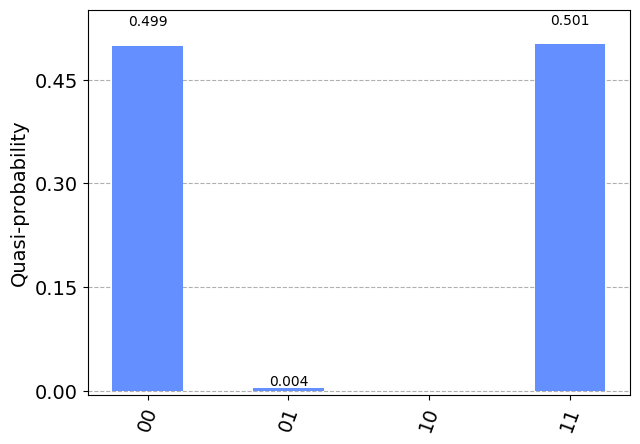

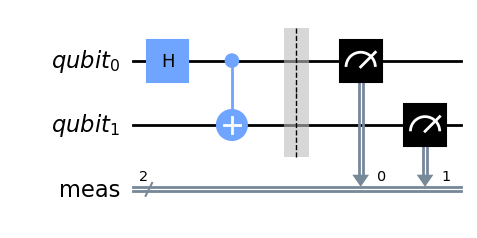

{"status": "Completed", "reason": null, "reason_code": null, "reason_internal": null}


In [12]:
from qiskit.providers.fake_provider import FakeManila
from qiskit_aer.noise import NoiseModel
from qiskit.visualization import plot_distribution

fake_backend = FakeManila()
noiseModel = NoiseModel.from_backend(fake_backend)
print(noiseModel)
options = Options()
options.simulator = {
    "noise_model": noiseModel,
    "basis_gates": fake_backend.configuration().basis_gates,
    "coupling_map": fake_backend.configuration().coupling_map,
    "seed_simulator": 42
}
options.execution.shots=100000
options.optimization_level = 0 #default=3
options.resilience_level = 1   #default=1

with Session(service=service, backend="ibmq_qasm_simulator"):
  sampler = Sampler(options = options)
  job = sampler.run(circuits=qc)
  print(job.result()) #shows quasi probabilities
  display(plot_distribution(job.result().quasi_dists[0].binary_probabilities()))
  display(job.inputs['circuits'][0].draw('mpl'))
  print(job.logs())

In [24]:
job.metadata

{}

In [15]:
import qiskit.tools.jupyter
%qiskit_version_table